In [5]:
!pip install kagglehub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 450.3 kB/s eta 0:00:00B/s eta 0:00:01


In [6]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rhonarosecortez/new-york-airbnb-open-data")

print("Path to dataset files:", path)

/home/kali/dev/ML/env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 2.83M/2.83M [00:03<00:00, 947kB/s] 

Extracting files...
Path to dataset files: /home/kali/.cache/kagglehub/datasets/rhonarosecortez/new-york-airbnb-open-data/versions/1


In [ ]:
import shutil
import os

shutil.move(path, os.getcwd())

'/home/kali/dev/ML/1'

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [10]:
calendar = pd.read_csv("1/calendar.csv")
reviews = pd.read_csv("1/reviews.csv")
listings = pd.read_csv("1/listings.csv")

In [11]:
print("calendar shape:", calendar.shape)
print("reviews shape:", reviews.shape)
print("listings shape:", listings.shape)


calendar shape: (155490, 7)
reviews shape: (24752, 6)
listings shape: (426, 75)


In [12]:
print("listings columns:", listings.columns)

listings columns: Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_ni

In [13]:
print("\nlistings data types:", listings.dtypes)



listings data types: id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
source                                           object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 75, dtype: object


In [14]:
print("listings missing values:", listings.isnull().sum())


listings missing values: id                                               0
listing_url                                      0
scrape_id                                        0
last_scraped                                     0
source                                           0
                                                ..
calculated_host_listings_count                   0
calculated_host_listings_count_entire_homes      0
calculated_host_listings_count_private_rooms     0
calculated_host_listings_count_shared_rooms      0
reviews_per_month                               60
Length: 75, dtype: int64


In [15]:
print("listings duplicates:", listings.duplicated().sum())

listings duplicates: 0


In [16]:
listings.dropna(thresh=0.5*len(listings), axis=1, inplace=True)

In [17]:
def clean_price_column(df):
    df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
    return df

listings = clean_price_column(listings)

In [18]:
def plot_room_type_distribution(df):
    plt.figure(figsize=(8,6))
    sns.countplot(data=df, x='room_type')
    plt.title("Distribution of Room Types")
    plt.xlabel("Room Type")
    plt.ylabel("Count")
    plt.show()

def plot_price_vs_review(df):
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=df, x='review_scores_rating', y='price', alpha=0.6)
    plt.title("Price vs. Review Score Rating")
    plt.xlabel("Review Score Rating")
    plt.ylabel("Price")
    plt.show()

def plot_correlation_heatmap(df):
    plt.figure(figsize=(10,8))
    corr = df[['price', 'review_scores_rating', 'accommodates', 'availability_365']].corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title("Correlation Heatmap")
    plt.show()

# Function to print summary statistics and correlation
def print_summary_statistics(df):
    print("Summary Statistics for Price and Ratings:")
    print(df[['price', 'review_scores_rating', 'availability_365']].describe())
    print("\nCorrelation Matrix:")
    print(df[['price', 'review_scores_rating', 'availability_365']].corr())

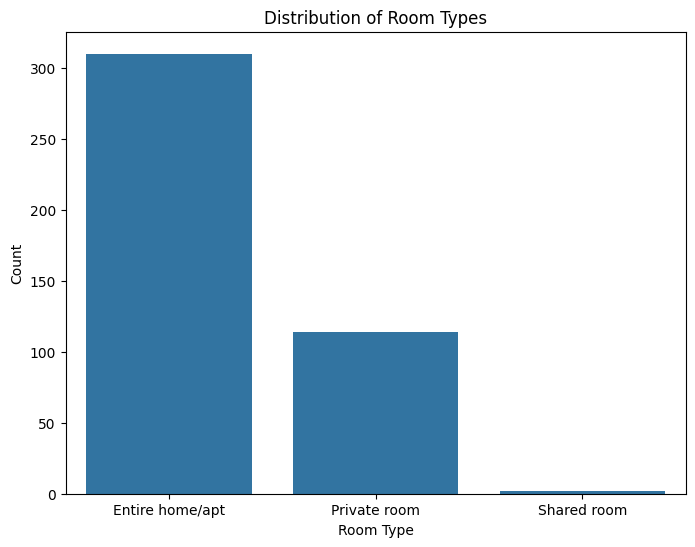

In [21]:
plot_room_type_distribution(listings)

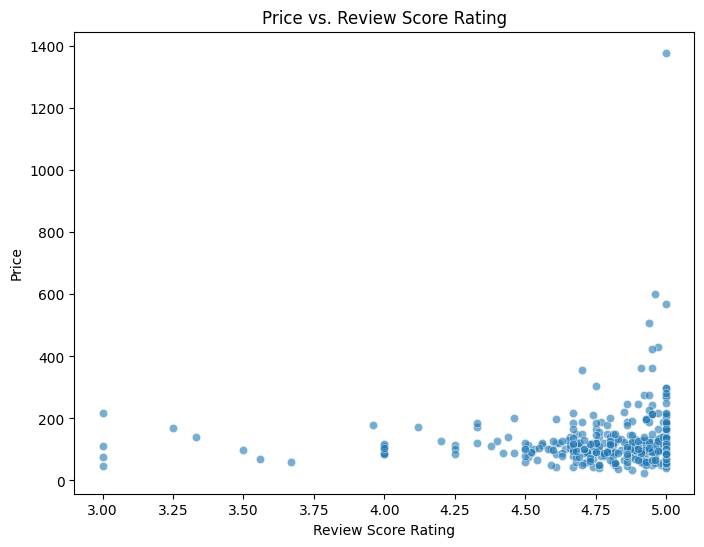

In [22]:
plot_price_vs_review(listings)

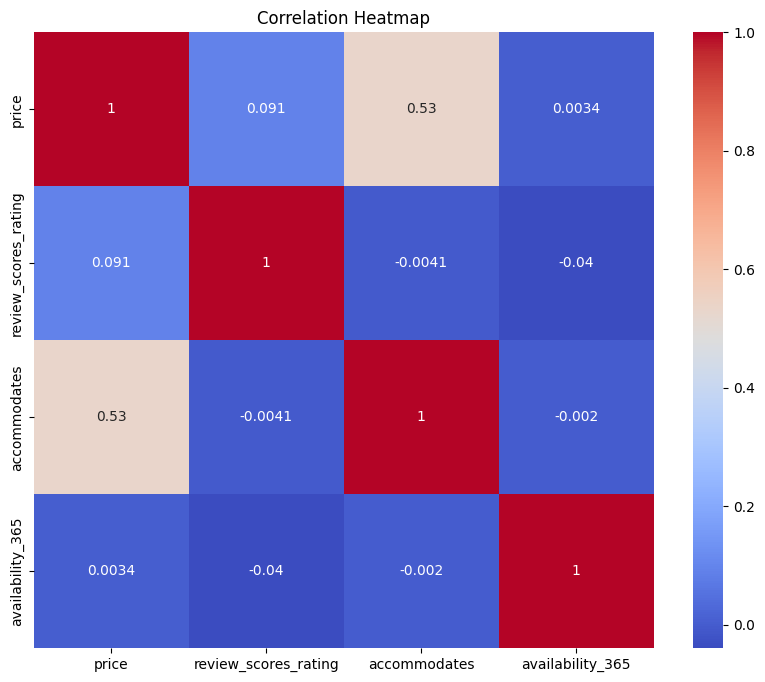

In [23]:
plot_correlation_heatmap(listings)

In [24]:
print_summary_statistics(listings)

Summary Statistics for Price and Ratings:
             price  review_scores_rating  availability_365
count   400.000000            366.000000        426.000000
mean    128.482500              4.766557        221.119718
std     125.503816              0.325399        120.480244
min      24.000000              3.000000          0.000000
25%      77.750000              4.700000         91.250000
50%     104.000000              4.860000        246.000000
75%     139.000000              4.970000        339.000000
max    1750.000000              5.000000        365.000000

Correlation Matrix:
                         price  review_scores_rating  availability_365
price                 1.000000              0.090711          0.003363
review_scores_rating  0.090711              1.000000         -0.039641
availability_365      0.003363             -0.039641          1.000000
